In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.linspace(0, 10, 30)
y = x**2 + np.random.randn(30)*10
x = x.reshape(-1, 1)

# Train-test split
indices = np.random.permutation(len(x))
split = int(0.7*len(x))
train_idx = indices[:split]
test_idx = indices[split:]
X_train = x[train_idx]
X_test = x[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]

In [2]:
# Define helper functions
def poly_features(x, degree):
    return np.column_stack([x.flatten()**i for i in range(degree+1)])

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

In [3]:
# Underfitting (degree=1)
Phi_train_1 = poly_features(X_train, 1)
Phi_all_1 = poly_features(x, 1)
w_under = np.linalg.pinv(Phi_train_1) @ y_train
y_under = Phi_all_1 @ w_under

In [4]:
# Overfitting (degree=10)
degree = 10
Phi_train_10 = poly_features(X_train, degree)
Phi_all_10 = poly_features(x, degree)
w_over = np.linalg.pinv(Phi_train_10) @ y_train
y_over = Phi_all_10 @ w_over

In [5]:
# Ridge Regression (Regularization)
lam = 10
I = np.eye(Phi_train_10.shape[1])
w_ridge = np.linalg.inv(Phi_train_10.T @ Phi_train_10 + lam*I) @ Phi_train_10.T @ y_train
y_ridge = Phi_all_10 @ w_ridge

In [6]:
# Print RMSE results
print("Underfitting RMSE:", rmse(y, y_under))
print("Overfitting RMSE:", rmse(y, y_over))
print("Ridge RMSE:", rmse(y, y_ridge))

Underfitting RMSE: 15.062493133700952
Overfitting RMSE: 9.437948486817362
Ridge RMSE: 10.222357853419846


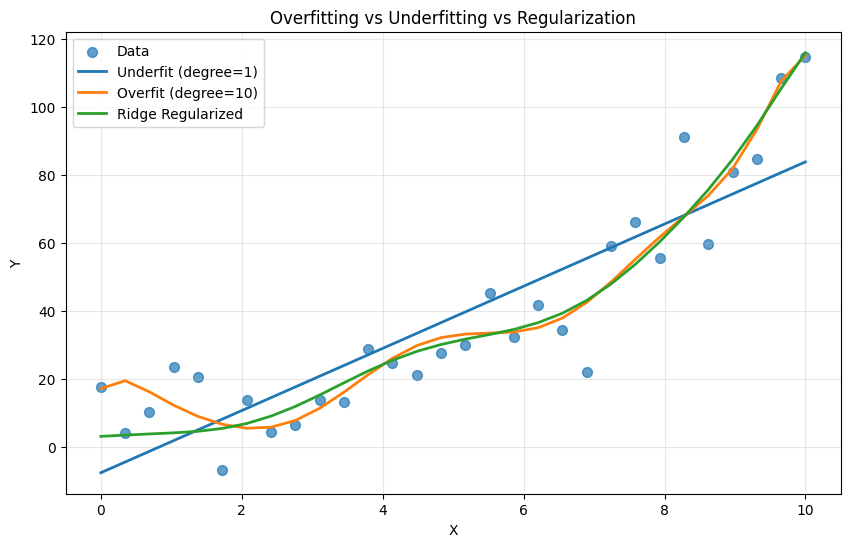

In [7]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Data", s=50, alpha=0.7)
plt.plot(x, y_under, label="Underfit (degree=1)", linewidth=2)
plt.plot(x, y_over, label="Overfit (degree=10)", linewidth=2)
plt.plot(x, y_ridge, label="Ridge Regularized", linewidth=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Overfitting vs Underfitting vs Regularization")
plt.grid(True, alpha=0.3)
plt.show()